<a href="https://colab.research.google.com/github/jacob-torres/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Jacob_Torres_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [26]:
# Function for finding sales stats
def sales_stats(sales):
  sales_mean = 0.0
  sales_variance = 0.0
  sales_std = 0.0
  
  # Calculate mean
  sum = 0
  for x in range(len(sales)):
    sum += sales[x]
  sales_mean = sum / len(sales)

# Calculate variance
  sum = 0
  for x in range(len(sales)):
    sum += (sales[x] - sales_mean) ** 2
  sales_variance = sum / (len(sales) -1)

  # Calculate standard deviation
  sales_std = sales_variance ** (1/2)

  return sales_mean, sales_variance, sales_std


In [25]:
import numpy as np
import pandas as pd

weekly_sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
sales_mean, sales_variance, sales_std = sales_stats(weekly_sales)

print(f"""
Sales mean = ${round(sales_mean, 2)}
Variance = ${round(sales_variance, 2)}
Standard deviation = ${round(sales_std, 2)}
""")


Sales mean = $3052.71
Variance = $214387.9
Standard deviation = $463.02



## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [3]:
weekly_customers = np.array([127, 80, 105, 92, 120, 115, 93])

# Transform sales and customer data into dataframe
data = {
    'weekly_sales': weekly_sales,
    'weekly_customers': weekly_customers
}
sales_df = pd.DataFrame(data)

# Calculate covariance between sales and customers
cov = sales_df.cov()
print(f"""Covariance between weekly sales and customers:
{cov}
""")

Covariance between weekly sales and customers:
                   weekly_sales  weekly_customers
weekly_sales      214387.904762       7604.357143
weekly_customers    7604.357143        290.952381



## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [4]:
customer_mean, customer_variance, customer_std = sales_stats(weekly_customers)
print(f"""
Standard deviation:
  Sales = ${round(sales_std, 2)}
  Customers = {round(customer_std, 3)}
""")


Standard deviation:
  Sales = $463.02
  Customers = 17.057



In [5]:
# Calculate the correlation coefficient
combined_std = sales_std * customer_std
combined_cov = cov['weekly_sales']['weekly_customers']
corr = combined_cov / combined_std
print(f"""The correlation between sales and customers last week:
  r = {round(corr, 3)}

Pandas correlation matrix:
{sales_df.corr()}
""")

The correlation between sales and customers last week:
  r = 0.963

Pandas correlation matrix:
                  weekly_sales  weekly_customers
weekly_sales          1.000000          0.962834
weekly_customers      0.962834          1.000000



## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [6]:
# Load Titanic dataset
data_url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
titanic_data = pd.read_csv(data_url)
titanic_data.drop(columns='Unnamed: 0', inplace=True)
print(titanic_data.shape)
titanic_data.head()

(1310, 15)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [7]:
titanic_data.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [8]:
titanic_data.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

The vectors below have a dot product of 0


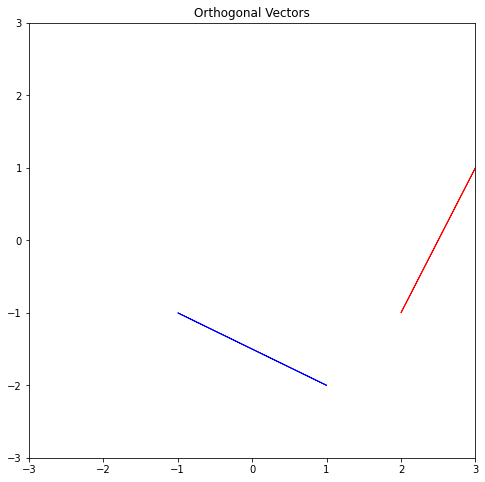

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

j = np.array([2, -1])
k = np.array([1, 2])
j_dot_k = np.vdot(j, k)
print(f"The vectors below have a dot product of {j_dot_k}")

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
ax.set_title("Orthogonal Vectors")
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.arrow(-1, -1, j[0],j[1], color='b')
ax.arrow(2, -1, k[0],k[1], color='r')

plt.show()

A synonym for orthogonal is perpendicular. In other words, two vectors that are orthogonal to each other will create a right angle at their intersection.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [31]:
# Calculate the dot product of the vectors
a = np.array([
              [-5, 3, 7]
])
b = np.array([
              [6, -8, 2]
])

a_dot_b = np.vdot(a, b)
print(f"""a.b = {a_dot_b}

Since the dot product = {a_dot_b}, and not 0,
the vectors are not orthogonal.
""")

a.b = -40

Since the dot product = -40, and not 0,
the vectors are not orthogonal.



## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [11]:
c = np.array([
              [2, -15, 6, 20]
])

print(f"""c = {c}
||c||^2 = {np.linalg.norm(c) ** 2}
c.c = {np.vdot(c, c)}
c^Tc = {c.T * c}
""")

c = [[  2 -15   6  20]]
||c||^2 = 665.0
c.c = 665
c^Tc = [[   4  -30   12   40]
 [ -30  225  -90 -300]
 [  12  -90   36  120]
 [  40 -300  120  400]]



- The squared norm of c = the dot product of c and itself.
- c multiplied by its transpose creates a 4x4 square matrix.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 
\begin{bmatrix} 1 \\ 0
\end{bmatrix}
+ 12 
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{bmatrix}

e = \begin{bmatrix} 2
\begin{bmatrix} 1 \\ 0 \\ 0
\end{bmatrix}
+ 11 
\begin{bmatrix} 0 \\ 1 \\ 0
\end{bmatrix}
+ -8
\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [12]:
f = np.array([
              [4, 12, 11, 9, 2]
])

f_norm = np.linalg.norm(f)
f_unit = f / f_norm
print(f_unit)

[[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

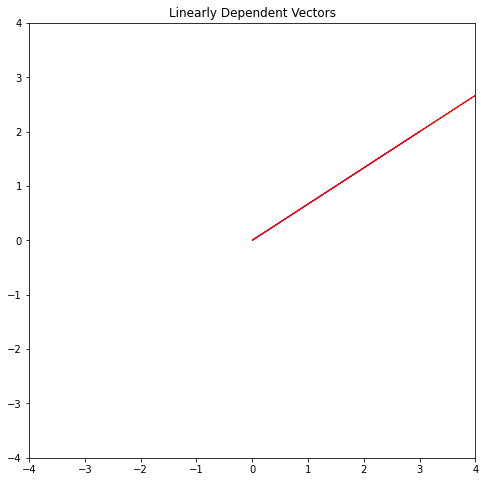

In [13]:
# Linearly dependent vectors
V = np.array([3, 2])
V2 = np.multiply(3, V)

plt.style.use('seaborn-bright')
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title("Linearly Dependent Vectors")
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.arrow(0,0, V[0],V[1], color='b')
ax.arrow(0,0, V2[0],V2[1], color='r')
plt.show()

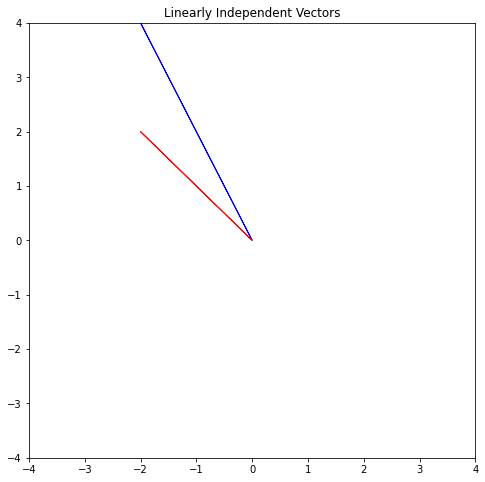

In [14]:
# Linearly Independent Vectors
V = np.array([-2, 4])
V2 = np.array([-2, 2])

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title("Linearly Independent Vectors")
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.arrow(0,0, V[0],V[1], color='b')
ax.arrow(0,0, V2[0],V2[1], color='r')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [33]:
g = np.array([1, 2])
h = np.array([4, 8])
matrix_gh = np.array([g, h])

print(f"""
Matrix gh = {matrix_gh}

h = 4g; g and h are linearly dependent.
span(gh) = line (1, 2), (4, 8)
""")


Matrix gh = [[1 2]
 [4 8]]

h = 4g; g and h are linearly dependent.
span(gh) = line (1, 2), (4, 8)



## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [34]:
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])
matrix_lmn = np.array([l, m, n])

print(f"""Matrix LMN
{matrix_lmn}

det(lmn) = {np.linalg.det(matrix_lmn)}
span(lmn) = 3 dimensional space
""")

Matrix LMN
[[ 1  2  3]
 [-1  0  7]
 [ 4  8  2]]

det(lmn) = -19.999999999999996
span(lmn) = 3 dimensional space



# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



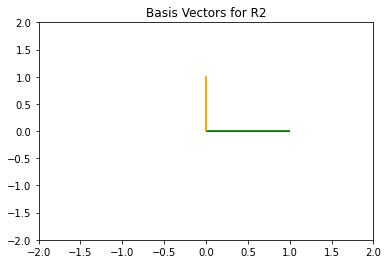

In [17]:
i_hat = np.array([1, 0])
j_hat = np.array([0, 1])

plt.title("Basis Vectors for R2")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.arrow(0,0, i_hat[0],i_hat[1], linewidth=1, color='green')
plt.arrow(0,0, j_hat[0],j_hat[1], linewidth=1, color='orange')
plt.show()

## 6.2 What does it mean to form a basis?

A set of vectors can form the basis of a vector space if they are linearly independent and can span the whole vector space by being scaled.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [35]:
p = np.array([
              [1, -1, 4],
              [2, 0, 8],
              [3, 7, 2]
              ])
p_rank = np.linalg.matrix_rank(p)

print(f"""
rank(p) = {p_rank}
""")


rank(p) = 3



## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the number of dimensions that the matrix vectors are able to span. The rank is never less than the smallest possible dimensionality of the matrix, but it may be less than the column space (number of columns.) If this is the case, it means that 1 or more of the column vectors are linearly dependent, and the dimensionality of the matrix is colapsed.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [45]:
v = np.array([
              [1, 3]
])
w = np.array([
              [-1, 2]
])
proj_lw = np.subtract(
    w, (np.vdot(v, w) /
           (np.linalg.norm(v) **2)) *v
)

print(f"""
proj l(w) = {proj_lw}
""")


proj l(w) = [[-1.5  0.5]]



# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

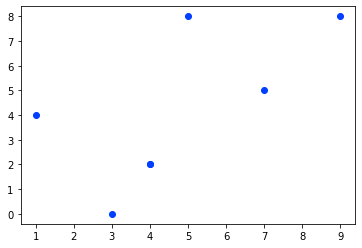

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()